In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x +2 + np.random.normal(0, 1, size=100)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [9]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)

mean_squared_error(y, y100_predict)

0.5189405100630826

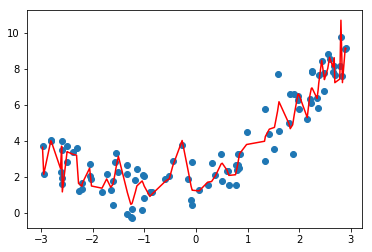

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)

mean_squared_error(y_test, y_predict)

3.6746501520444745

In [32]:
poly_reg = PolynomialRegression(degree=2)
poly_reg.fit(X_train, y_train)
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

0.9581018261658072

In [33]:
poly_reg = PolynomialRegression(degree=10)
poly_reg.fit(X_train, y_train)
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

1.0689228422238173

In [34]:
poly_reg = PolynomialRegression(degree=100)
poly_reg.fit(X_train, y_train)
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2900886639916013.5

随着多项式阶数增加使得模型的泛化能力变得极差